In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

!pip install plotly
import pandas as pd

NONE = value=107

pedalboards = pd.read_csv('data/pedalboard-plugin.csv', index_col=['id', 'name']).fillna(value=107)

pedalboards.plugin1 = pedalboards.plugin1.astype(int)
pedalboards.plugin2 = pedalboards.plugin2.astype(int)
pedalboards.plugin3 = pedalboards.plugin3.astype(int)
pedalboards.plugin4 = pedalboards.plugin4.astype(int)
pedalboards.plugin5 = pedalboards.plugin5.astype(int)
pedalboards.plugin6 = pedalboards.plugin6.astype(int)

pedalboards.head()

    100% |████████████████████████████████| 1.0MB 718kB/s ta 0:00:01
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /home/paulo/.cache/pip/wheels/c9/c4/00/a80b040dd8c9301d29f7153881c96edf1cd8561977ec440941
Successfully built plotly


,,plugin1,plugin2,plugin3,plugin4,plugin5,plugin6
id,name,,,,,,
9467,!!*Cuda',23,27,73,109,106,61
8913,'70s*V.H**,39,30,100,60,107,107
7313,'70s*V.H**,39,30,100,60,107,107
9471,'70s*V.H**,39,30,100,60,107,107
7313,'90s*V.H**,23,99,31,42,53,60


In [2]:
remover_none = lambda pedalboard: pedalboard[pedalboard != NONE]

pedalboard_sem_nome = remover_none(pedalboards.values[1])
pedalboard_sem_nome

array([ 39,  30, 100,  60])

In [3]:
from itertools import combinations

combinacoes = lambda pedalboard: combinations(pedalboard, r=2)
list(combinacoes(pedalboard_sem_nome))

[(39, 30), (39, 100), (39, 60), (30, 100), (30, 60), (100, 60)]

In [4]:
plugins_categories = pd.read_csv('data/plugin-category.csv', index_col='id').sort_index()
total_plugins = len(plugins_categories)

plugin_name = lambda index: plugins_categories.name[index]
total_plugins, plugin_name(116)

(117, 'VX JMI')

In [54]:
import plotly
from plotly.graph_objs import *



import networkx as nx

edge_trace = Scatter(
    x=[],
    y=[],
    line=Line(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')


node_trace = Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in nx.spring_layout(G):
    node_trace['x'].append(x)
    node_trace['y'].append(y)


fig = Figure(
    data=Data([edge_trace, node_trace]),
     layout=Layout(
        title='<br>Network graph made with Python',
        titlefont=dict(size=16),
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)
     )
)


plotly.offline.iplot(fig, filename='networkx')

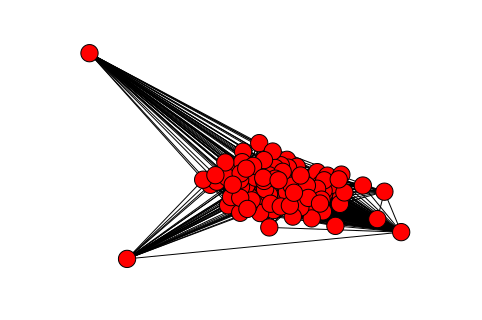

In [37]:
from functools import reduce
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

#'''
edges = reduce(lambda lista, pedalboard: lista + list(combinacoes(remover_none(pedalboard))), pedalboards.values, [])

for edge in edges:
    G.add_edge(
        plugin_name(edge[0]),
        plugin_name(edge[1]),
        weight=1
    )
#'''
'''
G.add_edge('a','b',weight=1)
G.add_edge('a','c',weight=.10)
G.add_edge('c','d',weight=1)
G.add_edge('c','e',weight=1)
G.add_edge('c','f',weight=1)
G.add_edge('a','d',weight=1)
'''
nx.draw(G, pos=nx.spring_layout(G))
#nx.get_node_attributes(G,'pos')

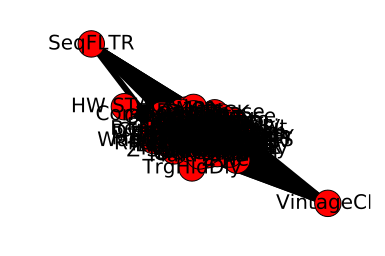

In [55]:

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]


pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,node_size=700)
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall, width=6,alpha=0.5,edge_color='b',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
#plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [ ]:
from igraph import Graph, plot

graph = Graph()
graph.add_vertices(total_plugins)

In [ ]:
from functools import reduce

graph.add_edges(reduce(lambda lista, pedalboard: lista + list(combinacoes(remover_none(pedalboard))), pedalboards.values, []))

In [ ]:
layout = graph.layout("kk")
plot(graph, layout = layout)